In [88]:
import pandas as pd
import geopandas as gd
import folium
import plotly.express as px
import altair as alt
import pylab as py
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv("top5-players.csv")

In [129]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,...,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,...,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,...,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,...,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


In [130]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls_90', 'Ast_90', 'G+A_90', 'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90',
       'xG+xAG_90', 'npxG_90', 'npxG+xAG_90'],
      dtype='object')

In [131]:
df['Nation'] = df['Nation'].str.split(' ').str[1]

In [149]:
asd = df.groupby("Nation")["G+A"].sum().reset_index()

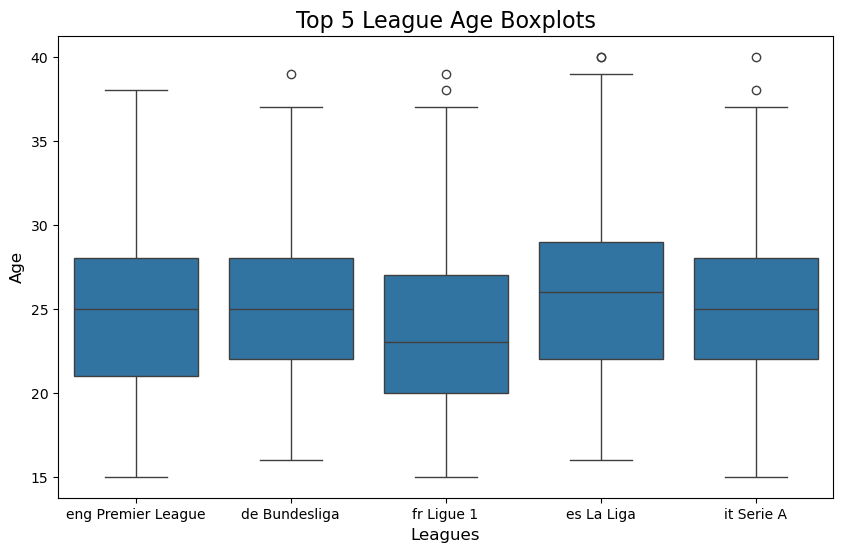

In [150]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.boxplot(x='Comp', y='Age', data=df)

# Add titles and labels
plt.title('Top 5 League Age Boxplots', fontsize=16)
plt.xlabel('Leagues', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Show the plot

plt.savefig("age_box.jpg")



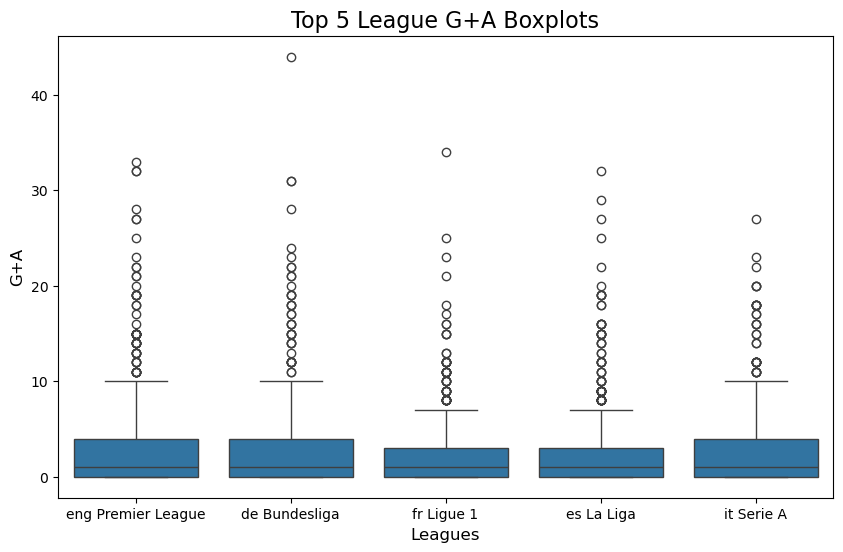

In [151]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.boxplot(x='Comp', y='G+A', data=df)

# Add titles and labels
plt.title('Top 5 League G+A Boxplots', fontsize=16)
plt.xlabel('Leagues', fontsize=12)
plt.ylabel('G+A', fontsize=12)

# Show the plot


plt.savefig("g+a.jpg")


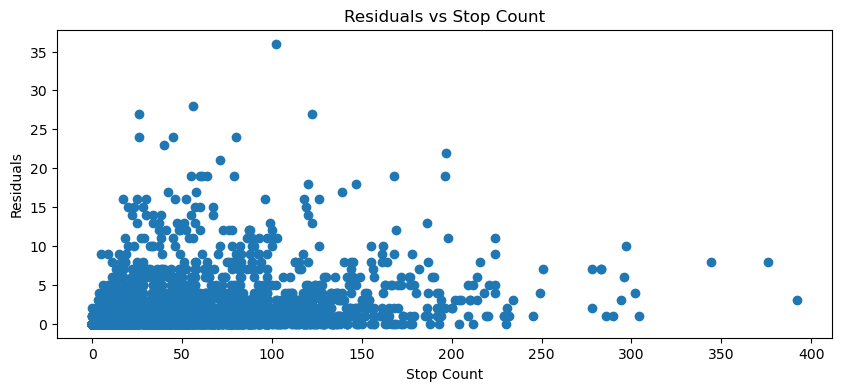

In [152]:
# residuals vs stop count
py.figure(figsize=(10, 4))
py.scatter(df["PrgP"], df["Gls"])
py.xlabel('Stop Count')
py.ylabel('Residuals')
py.title('Residuals vs Stop Count')
py.show()

In [153]:
asd["Nation"].unique()

array(['ALB', 'ALG', 'ANG', 'ARG', 'ARM', 'AUS', 'AUT', 'BDI', 'BEL',
       'BEN', 'BFA', 'BIH', 'BRA', 'BUL', 'CAN', 'CGO', 'CHI', 'CIV',
       'CMR', 'COD', 'COL', 'COM', 'CPV', 'CRC', 'CRO', 'CTA', 'CYP',
       'CZE', 'DEN', 'DOM', 'ECU', 'EGY', 'EQG', 'ESP', 'FIN', 'FRA',
       'GAB', 'GAM', 'GB', 'GEO', 'GER', 'GHA', 'GNB', 'GRE', 'GRN',
       'GUF', 'GUI', 'HAI', 'HON', 'HUN', 'IRL', 'IRN', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KEN', 'KOR', 'KVX', 'LTU', 'LUX',
       'MAD', 'MAR', 'MEX', 'MKD', 'MLI', 'MLT', 'MNE', 'MOZ', 'MTQ',
       'NED', 'NGA', 'NIR', 'NOR', 'NZL', 'PAN', 'PAR', 'PER', 'PHI',
       'POL', 'POR', 'ROU', 'RSA', 'RUS', 'SCO', 'SEN', 'SLE', 'SRB',
       'SUI', 'SUR', 'SVK', 'SVN', 'SWE', 'SYR', 'TOG', 'TUN', 'TUR',
       'UKR', 'URU', 'USA', 'UZB', 'VEN', 'WAL', 'ZAM', 'ZIM'],
      dtype=object)

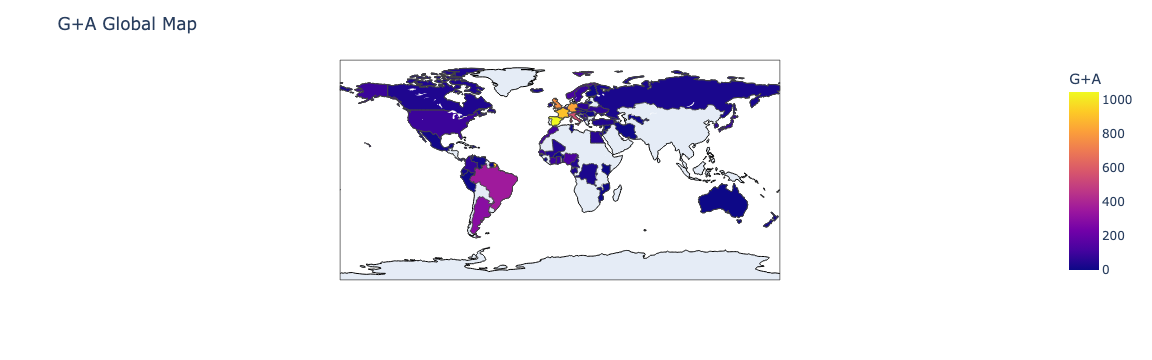

In [166]:
asd["Nation"] = asd["Nation"].replace("GB", "GBR")
asd["Nation"] = asd["Nation"].replace("GER", "DEU")
asd["Nation"] = asd["Nation"].replace("POR", "PR")
asd["Nation"] = asd["Nation"].replace("NED", "NL")
fig = px.choropleth(
    asd,  # Pass the entire DataFrame
    locations="Nation",  # Locations column (country codes)
    color="G+A",  # Values to color the countries by
    hover_name="Nation",  # Country names to show when hovering
    hover_data={"Nation": True, "G+A": True},  # Additional data to show in hover (e.g., G+A)
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black")  # Optional: Show coastlines for clarity
fig.update_layout(title_text="G+A Global Map")

# Save the map as an HTML file
fig.write_html("map.html")
fig.show()

In [163]:
asd["Nation"].unique()

array(['ALB', 'ALG', 'ANG', 'ARG', 'ARM', 'AUS', 'AUT', 'BDI', 'BEL',
       'BEN', 'BFA', 'BIH', 'BRA', 'BUL', 'CAN', 'CGO', 'CHI', 'CIV',
       'CMR', 'COD', 'COL', 'COM', 'CPV', 'CRC', 'CRO', 'CTA', 'CYP',
       'CZE', 'DEN', 'DOM', 'ECU', 'EGY', 'EQG', 'ESP', 'FIN', 'FRA',
       'GAB', 'GAM', 'GB', 'GEO', 'DEU', 'GHA', 'GNB', 'GRE', 'GRN',
       'GUF', 'GUI', 'HAI', 'HON', 'HUN', 'IRL', 'IRN', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KEN', 'KOR', 'KVX', 'LTU', 'LUX',
       'MAD', 'MAR', 'MEX', 'MKD', 'MLI', 'MLT', 'MNE', 'MOZ', 'MTQ',
       'NED', 'NGA', 'NIR', 'NOR', 'NZL', 'PAN', 'PAR', 'PER', 'PHI',
       'POL', 'PT', 'ROU', 'RSA', 'RUS', 'SCO', 'SEN', 'SLE', 'SRB',
       'SUI', 'SUR', 'SVK', 'SVN', 'SWE', 'SYR', 'TOG', 'TUN', 'TUR',
       'UKR', 'URU', 'USA', 'UZB', 'VEN', 'WAL', 'ZAM', 'ZIM'],
      dtype=object)

In [184]:
team = df.groupby(["Squad", "Comp"])[["PrgP", "Gls"]].sum().reset_index()

In [185]:
team.to_csv("team.csv")

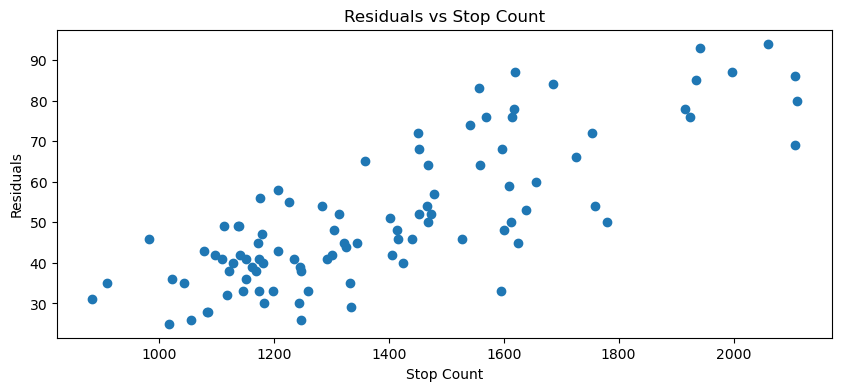

In [186]:
# residuals vs stop count
py.figure(figsize=(10, 4))
py.scatter(team["PrgP"], team["Gls"])
py.xlabel('Stop Count')
py.ylabel('Residuals')
py.title('Residuals vs Stop Count')
py.show()

In [187]:
team

,Squad,Comp,PrgP,Gls
0,Alavés,es La Liga,1260.0,33
1,Almería,es La Liga,1097.0,42
2,Arsenal,eng Premier League,2106.0,86
3,Aston Villa,eng Premier League,1451.0,72
4,Atalanta,it Serie A,1754.0,72
...,...,...,...,...
91,Villarreal,es La Liga,1558.0,64
92,Werder Bremen,de Bundesliga,1172.0,45
93,West Ham,eng Premier League,1207.0,58
94,Wolfsburg,de Bundesliga,1235.0,41


In [188]:
team[0:50]

,Squad,Comp,PrgP,Gls
0,Alavés,es La Liga,1260.0,33
1,Almería,es La Liga,1097.0,42
2,Arsenal,eng Premier League,2106.0,86
3,Aston Villa,eng Premier League,1451.0,72
4,Atalanta,it Serie A,1754.0,72
5,Athletic Club,es La Liga,1610.0,59
6,Atlético Madrid,es La Liga,1597.0,68
7,Augsburg,de Bundesliga,1137.0,49
8,Barcelona,es La Liga,1925.0,76
9,Bayern Munich,de Bundesliga,1941.0,93
